# Uniformity dichotomy between Earths and Super-Earths

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from util import *

In [2]:
data_CKS = pickle.load(open('./data/CKS.pkl','rb'))
data_CKS_W18 = pickle.load(open('./data/CKS_W18.pkl','rb'))

In [3]:
m_solar = np.array([0.0553, 0.815, 1, 0.107, 317.8, 95.2, 14.5, 17.1])*Mearth
a_solar = np.array([0.387, 0.723, 1, 1.52, 5.20, 9.57, 19.17, 30.18])
q_solar = m_solar[:4]/Msun # inner solar system

m_trappist = np.array([1.374, 1.308, 0.388, 0.692, 1.039, 1.321, 0.326])*Mearth
a_trappist = np.array([0.01154, 0.01580, 0.02227, 0.02925, 0.03849, 0.04683, 0.06189])
q_trappist = m_trappist/(0.0898*Msun)

In [4]:
def get_pairwise_difference(data):
    n = len(data['system'])
    if n <= 1:
        return None
    I = np.argsort(data['a_p_au'])
    q = (data['m_p_mearth']/data['m_star_msun'])[I] * Mearth/Msun
    return [np.sqrt(q[1:]*q[:-1]), q[1:]/q[:-1]]

In [5]:
def plot_pairwise_difference(data):
    d = process_data(data, get_pairwise_difference)
    q_mean = np.array([d2 for d1 in d for d2 in d1[0]])
    q_diff = np.array([d2 for d1 in d for d2 in d1[1]])

    fig = plt.figure(figsize=(5,3.5))
    fig.add_axes([0.13,0.13,0.82,0.82])
    
    plt.xscale('log'); plt.xlim(2e-7,5e-4); plt.xlim(1e-6,1e-4)
    plt.yscale('log'); plt.ylim(2e-2,1e2)
    plt.xlabel(r'mean mass $(q_1q_2)^{1/2}$')
    plt.ylabel(r'mass difference $q_2/q_1$')
    plt.gca().tick_params(right=True,top=True,which='both',direction='in')
    
    ql = plt.xlim()[0]*1.1
    qr = plt.xlim()[1]/1.1
    I0 = (q_mean > ql)*(q_mean<qr)
    I1 = q_mean<=ql
    I2 = q_mean>=qr
    plt.plot(q_mean[I0], q_diff[I0], color='k', marker='o', ls='', mew=0, ms=4, alpha=.2)
    plt.plot(q_mean[I1]*0+ql/1.05, q_diff[I1], color='k', marker='<', ls='', mew=0, ms=4, alpha=.2)
    plt.plot(q_mean[I2]*0+qr*1.05, q_diff[I2], color='k', marker='>', ls='', mew=0, ms=4, alpha=.2)
    
    def plot_solar():
        q_mean = np.sqrt(q_solar[1:]*q_solar[:-1])
        q_diff = q_solar[1:]/q_solar[:-1]
        I0 = (q_mean > ql)*(q_mean<qr)
        I1 = q_mean<=ql
        I2 = q_mean>=qr
        plt.plot(q_mean[I0], q_diff[I0], color='tab:blue', marker='s', ls='', mew=0, ms=5, alpha=1)
        plt.plot(q_mean[I1]*0+ql/1.05, q_diff[I1], color='tab:blue', marker='<', ls='', mew=0, ms=6, alpha=1)
        plt.plot(q_mean[I2]*0+qr*1.05, q_diff[I2], color='tab:blue', marker='>', ls='', mew=0, ms=6, alpha=1)
    def plot_trappist():
        q_mean = np.sqrt(q_trappist[1:]*q_trappist[:-1])
        q_diff = q_trappist[1:]/q_trappist[:-1]
        I0 = (q_mean > ql)*(q_mean<qr)
        I1 = q_mean<=ql
        I2 = q_mean>=qr
        plt.plot(q_mean[I0], q_diff[I0], color='tab:orange', marker='D', ls='', mew=0, ms=5, alpha=1)
        plt.plot(q_mean[I1]*0+ql/1.05, q_diff[I1], color='tab:orange', marker='<', ls='', mew=0, ms=5, alpha=1)
        plt.plot(q_mean[I2]*0+qr*1.05, q_diff[I2], color='tab:orange', marker='>', ls='', mew=0, ms=5, alpha=1)
    plot_solar()
    plot_trappist()

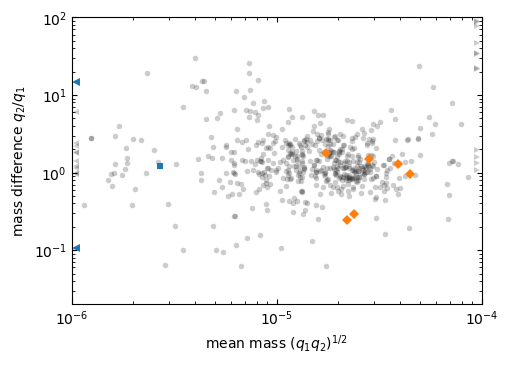

In [6]:
plot_pairwise_difference(data_CKS)
#plt.savefig('figures/superearth_uniformity1.pdf')

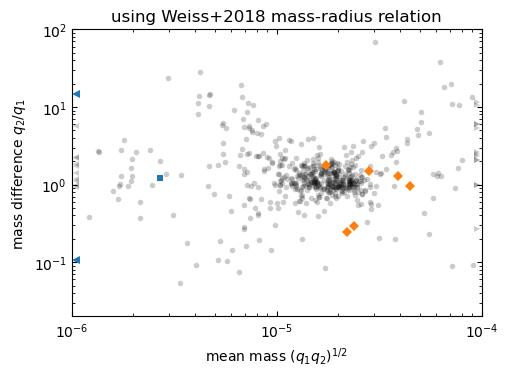

In [7]:
plot_pairwise_difference(data_CKS_W18)
_ = plt.title('using Weiss+2018 mass-radius relation')

# Fit the distribution to log-normal and correct for radius uncertainty

In [8]:
d = process_data(data_CKS, get_pairwise_difference)
q_mean = np.array([d2 for d1 in d for d2 in d1[0]])
q_diff = np.array([d2 for d1 in d for d2 in d1[1]])
log_q = np.log(q_mean)
d_log_q = np.log(q_diff)

In [9]:
# estimate the level of uncertainty:
def get_log_m_err_from_log_r_err(m, log_r_err):
    if m<2:
        log_m_err = log_r_err/0.28
    elif m<0.4*Mjup/Mearth:
        log_m_err = log_r_err/0.59
    elif m<0.08*Msun/Mearth:
        log_m_err = log_r_err/0.04
    else:
        log_m_err = log_r_err/0.88
    return log_m_err
log_m_err = np.array([get_log_m_err_from_log_r_err(m,log_r_err) for m,log_r_err in zip(data_CKS['m_p_mearth'],data_CKS['r_p_err_rearth']/data_CKS['r_p_rearth'])])
data_CKS['log_m_err'] = log_m_err
print('rms log mass error due to radius uncertainty =',np.sqrt(np.mean(log_m_err**2*2)))

rms log mass error due to radius uncertainty = 0.6780820507341645


In [10]:
def get_pairwise_log_err(data):
    n = len(data['system'])
    if n <= 1:
        return None
    I = np.argsort(data['a_p_au'])
    q = (data['m_p_mearth']/data['m_star_msun'])[I] * Mearth/Msun
    log_err = np.sqrt(data['log_m_err'][1:]**2 + data['log_m_err'][:-1]**2)
    return [np.sqrt(q[1:]*q[:-1]), log_err]
d = process_data(data_CKS, get_pairwise_log_err)
d_log_q_err = np.array([d2 for d1 in d for d2 in d1[1]])

### Weighted average with moving window

In [11]:
def generate_gaussian_weight(x, n):
    length = len(x)
    n_bins = int(length/n*5) # 5x denser window
    i_edges = np.linspace(0, length, n_bins+1)
    i_center = (i_edges[1:]+i_edges[:-1])/2
    w = np.zeros((n_bins, length))
    x_mean = np.zeros(n_bins)
    I = np.argsort(x)
    I = np.argsort(np.arange(length)[I]) # now I[i] means x[I[i]] = sort(x)[i]
    for i in range(n_bins):
        w[i] = np.exp(-(I-i_center[i])**2/2/n**2)
        x_mean[i] = np.mean(x*w[i])/np.mean(w[i])
    return w, x_mean

def apply_weight(x, y, w, f, *args):
    n_bins = w.shape[0]
    z = np.zeros(n_bins)
    for i in range(n_bins):
        z[i] = f(x, y, w[i], *args)
    return z

def weighted_avg(x, y, w):
    return np.mean(y*w)/np.mean(w)

def weighted_std(x, y, w):
    y_avg = np.mean(y*w)/np.mean(w)
    return np.sqrt(np.mean((y-y_avg)**2*w)/np.mean(w))

def weighted_rms(x, y, w):
    return np.sqrt(np.mean(y**2*w)/np.mean(w))

from scipy.interpolate import interp1d
def weighted_quantile(x, y, w, quantile):
    i = np.argsort(y)
    y = y[i]
    w = w[i]
    c = np.cumsum(np.array(w)) - np.array(w)/2
    c = c/np.sum(w)
    f = interp1d(c, y)
    return f(quantile)

In [12]:
n = 30
w, log_q_binned = generate_gaussian_weight(log_q, n)

d_log_q_mean_binned = apply_weight(log_q, d_log_q, w, weighted_avg)
d_log_q_std_binned = apply_weight(log_q, d_log_q, w, weighted_std)
d_log_q_err_binned = apply_weight(log_q, d_log_q_err, w, weighted_rms)

d_log_q_mid_binned = apply_weight(log_q, d_log_q, w, weighted_quantile, .5)
d_log_q_16_binned = apply_weight(log_q, d_log_q, w, weighted_quantile, .16)
d_log_q_84_binned = apply_weight(log_q, d_log_q, w, weighted_quantile, .84)
d_log_q_2d5_binned = apply_weight(log_q, d_log_q, w, weighted_quantile, .025)
d_log_q_97d5_binned = apply_weight(log_q, d_log_q, w, weighted_quantile, .975)

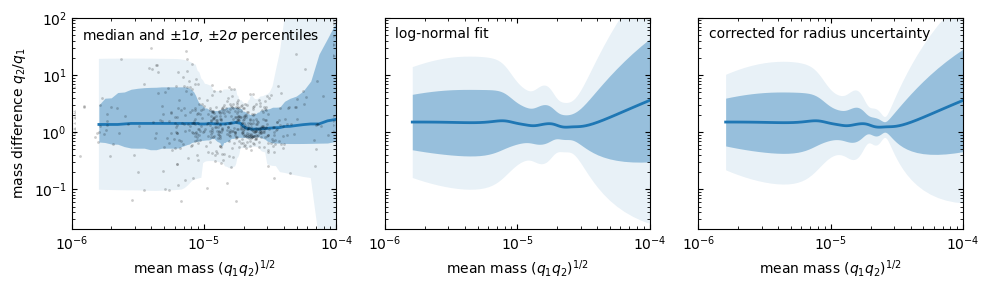

In [13]:
fig, ax = plt.subplots(1,3, figsize=(10,3), sharey=True)
plt.sca(ax[0])
plt.xscale('log'); plt.xlim(1e-6,1e-4)
plt.yscale('log'); plt.ylim(2e-2,1e2)
plt.xlabel(r'mean mass $(q_1q_2)^{1/2}$')
plt.ylabel(r'mass difference $q_2/q_1$')
plt.gca().tick_params(right=True,top=True,which='both',direction='in')
plt.sca(ax[1])
plt.xscale('log'); plt.xlim(1e-6,1e-4)
plt.yscale('log'); plt.ylim(2e-2,1e2)
plt.xlabel(r'mean mass $(q_1q_2)^{1/2}$')
plt.gca().tick_params(right=True,top=True,which='both',direction='in')
plt.sca(ax[2])
plt.xscale('log'); plt.xlim(1e-6,1e-4)
plt.yscale('log'); plt.ylim(2e-2,1e2)
plt.xlabel(r'mean mass $(q_1q_2)^{1/2}$')
plt.gca().tick_params(right=True,top=True,which='both',direction='in')
plt.tight_layout()

x = np.exp(log_q_binned)
d_log_q_std_binned_corrected = np.sqrt(np.maximum(d_log_q_std_binned**2 - d_log_q_err_binned**2, 0))

x_s = np.log(q_solar[1:]*q_solar[:-1])/2
y_s = np.log(q_solar[1:]/q_solar[:-1])
x_t = np.log(q_trappist[1:]*q_trappist[:-1])/2
y_t = np.log(q_trappist[1:]/q_trappist[:-1])

plt.sca(ax[0])
plt.plot(x, np.exp(d_log_q_mid_binned), 'tab:blue', lw=2)
plt.fill_between(x, np.exp(d_log_q_16_binned), np.exp(d_log_q_84_binned), color='tab:blue', lw=0, alpha=.4)
plt.fill_between(x, np.exp(d_log_q_2d5_binned), np.exp(d_log_q_97d5_binned), color='tab:blue', lw=0, alpha=.1)

ql = plt.xlim()[0]*1.1
qr = plt.xlim()[1]/1.1
I0 = (q_mean > ql)*(q_mean<qr)
I1 = q_mean<=ql
I2 = q_mean>=qr
plt.plot(q_mean[I0], q_diff[I0], color='k', marker='o', ls='', mew=0, ms=2, alpha=.2)
plt.plot(q_mean[I1]*0+ql/1.05, q_diff[I1], color='k', marker='<', ls='', mew=0, ms=2, alpha=.2)
plt.plot(q_mean[I2]*0+qr*1.05, q_diff[I2], color='k', marker='>', ls='', mew=0, ms=2, alpha=.2)

plt.text(1.2e-6,70,'median and $\pm1\sigma$, $\pm 2 \sigma$ percentiles',va='top')

plt.sca(ax[1])
plt.plot(x, np.exp(d_log_q_mean_binned), 'tab:blue', lw=2)
plt.fill_between(x, np.exp(d_log_q_mean_binned-d_log_q_std_binned), np.exp(d_log_q_mean_binned+d_log_q_std_binned), color='tab:blue', lw=0, alpha=.4)
plt.fill_between(x, np.exp(d_log_q_mean_binned-2*d_log_q_std_binned), np.exp(d_log_q_mean_binned+2*d_log_q_std_binned), color='tab:blue', lw=0, alpha=.1)

plt.text(1.2e-6,70,'log-normal fit',va='top')


plt.sca(ax[2])
plt.plot(x, np.exp(d_log_q_mean_binned), 'tab:blue', lw=2)
plt.fill_between(x, np.exp(d_log_q_mean_binned-d_log_q_std_binned_corrected), np.exp(d_log_q_mean_binned+d_log_q_std_binned_corrected), color='tab:blue', lw=0, alpha=.4)
plt.fill_between(x, np.exp(d_log_q_mean_binned-2*d_log_q_std_binned_corrected), np.exp(d_log_q_mean_binned+2*d_log_q_std_binned_corrected), color='tab:blue', lw=0, alpha=.1)

plt.text(1.2e-6,70,'corrected for radius uncertainty',va='top')

#plt.savefig('./figures/q_distribution.pdf')
plt.show()

### Annotated plot in main text

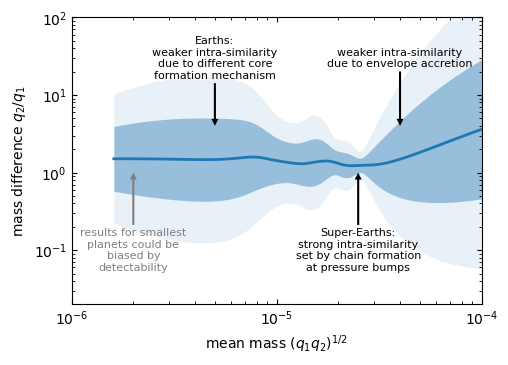

In [14]:
fig = plt.figure(figsize=(5,3.5))
fig.add_axes([0.13,0.13,0.82,0.82])

plt.xscale('log'); plt.xlim(2e-7,5e-4); plt.xlim(1e-6,1e-4)
plt.yscale('log'); plt.ylim(2e-2,1e2)
plt.xlabel(r'mean mass $(q_1q_2)^{1/2}$')
plt.ylabel(r'mass difference $q_2/q_1$')
plt.gca().tick_params(right=True,top=True,which='both',direction='in')

plt.plot(x, np.exp(d_log_q_mean_binned), 'tab:blue', lw=2)
plt.fill_between(x, np.exp(d_log_q_mean_binned-d_log_q_std_binned_corrected), np.exp(d_log_q_mean_binned+d_log_q_std_binned_corrected), color='tab:blue', lw=0, alpha=.4)
plt.fill_between(x, np.exp(d_log_q_mean_binned-2*d_log_q_std_binned_corrected), np.exp(d_log_q_mean_binned+2*d_log_q_std_binned_corrected), color='tab:blue', lw=0, alpha=.1)

plt.annotate('Super-Earths:\nstrong intra-similarity\nset by chain formation\nat pressure bumps', (2.5e-5,1), (2.5e-5,0.1),
             arrowprops=dict(facecolor='black', width=1.5, headwidth=5, headlength=5, lw=0), ha='center', va='center', fontsize=8)

plt.annotate('Earths:\nweaker intra-similarity\ndue to different core\nformation mechanism', (5e-6,4), (5e-6,30),
             arrowprops=dict(facecolor='black', width=1.5, headwidth=5, headlength=5, lw=0), ha='center', va='center', fontsize=8)

plt.annotate('weaker intra-similarity\ndue to envelope accretion', (4e-5,4), (4e-5,30),
             arrowprops=dict(facecolor='black', width=1.5, headwidth=5, headlength=5, lw=0), ha='center', va='center', fontsize=8)

plt.annotate('results for smallest\nplanets could be\nbiased by\ndetectability', (2e-6,1), (2e-6,0.1),
             arrowprops=dict(facecolor='tab:grey', width=1.5, headwidth=5, headlength=5, lw=0), ha='center', va='center', fontsize=8, color='tab:grey')

#plt.savefig('./figures/superearth_uniformity2.pdf')
plt.show()

# Heteroscedasticity tests

In [15]:
import statsmodels.api as sm

In [16]:
d = process_data(data_CKS, get_pairwise_difference)
q_mean = np.array([d2 for d1 in d for d2 in d1[0]])
q_diff = np.array([d2 for d1 in d for d2 in d1[1]])
log_q = np.log(q_mean)
d_log_q = np.log(q_diff)

In [17]:
x = log_q[:]
y = d_log_q[:]
print('full CKSM:', len(x), 'pairs')


x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
lm, lm_pvalue, fvalue, f_pvalue = sm.stats.diagnostic.het_white(model.resid,  model.model.exog)
print('White: p =', lm_pvalue)
lm, lm_pvalue, fvalue, f_pvalue = sm.stats.diagnostic.het_breuschpagan(model.resid,  model.model.exog)
print('Breusch-Pagan: p =', lm_pvalue)

full CKSM: 554 pairs
White: p = 5.699613349116474e-31
Breusch-Pagan: p = 1.405905078152806e-15


In [18]:
I = np.exp(log_q)<3e-5

x = log_q[I]
y = d_log_q[I]
print('q_mean<3e-5:', len(x), 'pairs')


x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
lm, lm_pvalue, fvalue, f_pvalue = sm.stats.diagnostic.het_white(model.resid,  model.model.exog)
print('White: p =', lm_pvalue)
lm, lm_pvalue, fvalue, f_pvalue = sm.stats.diagnostic.het_breuschpagan(model.resid,  model.model.exog)
print('Breusch-Pagan: p =', lm_pvalue)

q_mean<3e-5: 465 pairs
White: p = 1.236675234747485e-11
Breusch-Pagan: p = 2.9800100197882026e-06
